# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Современные методы машинного обучения" </center>

# <center> Лабораторная работа №2. Детектирование букв. </center>

Вам дано два датасета: train.csv и test.csv. Каждая строчка в файлах - это одна картинка с буквой, в строчке 785 элементов, первый элемент - класс, все остальные - картинка 28х28:

In [1]:
import pandas as pd
train = pd.read_csv("train.csv", header=None)

In [2]:
import numpy as np
train = np.asarray(train)
first_pic = train[8]
pic_label, pic = first_pic[0], first_pic[1:]
print(pic_label)

7


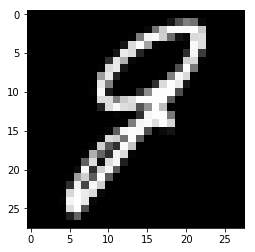

In [4]:
import matplotlib.pyplot as plt
plt.imshow(pic.reshape((28, 28)).T, cmap='gray')
plt.show()

a, b, c, d, e, f, g - 7ая буква английского алфавита. 

In [5]:
import tensorflow as tf
from tensorflow import keras

## Задание

1) Создать модель нейронной сети, которая предсказывает букву по картинке. Модель обучать на данных из train.csv, качество модели проверять на данных из файла test.csv. Для построения модели желательно использовать библиотеки tensorflow и keras.
    1. Обязательно : построить модели с 2мя и 3мя скрытыми слоями, количество нейронов в слоях подобрать таким, какое вы считаете необходимым (по результатам обучения). 
    2. Объяснить выбор оптимальных параметров нейронной сети - количество и состав слоёв, нейронов на каждом слое, функций активации и других параметров. (3 балла за пункты 1-2)
    3. По желанию: попробовать другие возможные архитектуры (большее/меньшее количество слоёв, нейронов, свёрточные слои) с объяснением выбора и указанием получившихся результатов качества модели. Выбрать наилучшую модель. (1-2 балла)
2) Для наилучшей модели построить матрицу смежности (confusion_matrix) результатов предсказаний модели на тестовых данных (2 балла):
    1. Найти 10 пар букв, которые чаще всего путаются между собой - объяснить с логической точки зрения почему. Привести примеры с картинками, которые были детектированы с ошибкой.
    2. Насколько равномерно обучилась ваша модель, а именно все ли буквы определяются с примерно одинаковой точностью? Приведите доказательства вашей точки зрения, а также буквы с самым лучшим и с самым худшим процентом детекции (точностью детекции).
    3. Возьмите первую букву вашей фамилии и укажите её точность детекции. С какими буквами ваша модель чаще всего путает эту букву?
3) Оценка качества:
    - >0.85    +1 балл
    - >0.95    +2 балла
    - >0.99    +3 балла
4) Творческое задание (3 балла). Написать на листке белой бумаги (маркером или ручкой) от 5 разных букв (можно больше 5и букв в целом с повторениями, но должно быть 5 разных) английского алфавита (в датасете есть как прописные, так и строчные буквы). Сфотографировать букву и привести её картинку к размеру 28х28 и чёрно-белой палитре цветов. Сделать предсказание буквы вашей моделью. Получилось? :)
    - В датасете все буквы занимают практически всё пространство картинки по высоте или ширине (или вместе). Если ваша буква будет слишком маленькой или большой, это может повлиять на результат детекции.
    - Помните, что буква должна быть белого цвета, а фон - чёрного. Или другими словами, картинка должна в итоге представлять из себя 784 значения от 0 до 255 (целых) или от 0 до 1 (если вы приводите весь датасет к такому виду).
    - Также важно, что в исходном датасете все картинки транспонированы (см. 3 часть кода выше, 2ую строчку), а значит для корректной детекции надо транспонировать картинку, перед тем как делать функцию reshape. Либо надо перед обучением транспонировать все картинки, чтобы правильно посылать их на обучение.
    - Описание ваших действий по выполнению этого задания (что вы использовали чтобы привести картинку к нужному виду) полностью приветствуется преподавателями :)

In [6]:
train = pd.DataFrame(train)

In [7]:
train_images = np.array(train.loc[:, 1:])
train_labels = np.array(train[0])

In [8]:
test = pd.read_csv("test.csv", header=None)

In [9]:
test_images = np.array(test.loc[:, 1:])
test_labels = np.array(test[0])

In [10]:
print('Train data size:', train_images.shape,
      '\nTest data size:', test_images.shape,
      '\n\nTrain label size:', train_labels.shape,
      '\nTest label size:', test_labels.shape)

Train data size: (65000, 784) 
Test data size: (13000, 784) 

Train label size: (65000,) 
Test label size: (13000,)


In [11]:
train_labels

array([ 5, 25,  1, ...,  4,  7, 21], dtype=int64)

In [12]:
np.unique(train_labels, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64),
 array([2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500,
        2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500,
        2500, 2500, 2500, 2500], dtype=int64))

In [13]:
train_labels = train_labels-1

In [14]:
train_labels

array([ 4, 24,  0, ...,  3,  6, 20], dtype=int64)

In [15]:
np.unique(train_labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64),
 array([2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500,
        2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500,
        2500, 2500, 2500, 2500], dtype=int64))

In [16]:
test_labels = test_labels - 1

In [17]:
np.unique(test_labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64),
 array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500],
       dtype=int64))

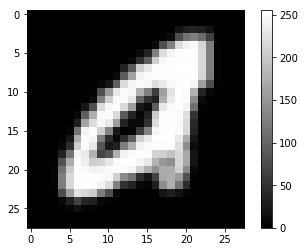

In [18]:
pic = train_images[2]

plt.imshow(pic.reshape((28, 28)).T, cmap='gray')
plt.colorbar()
plt.show()

In [19]:
train_labels[2]

0

In [20]:
train_images = train_images / 255.0
test_images = test_images / 255.0

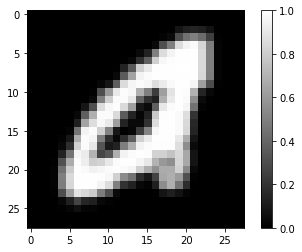

In [21]:
pic = train_images[2]

plt.imshow(pic.reshape((28, 28)).T, cmap='gray')
plt.colorbar()
plt.show()

In [21]:
linear_model = keras.Sequential([
    keras.layers.Flatten(), 
    keras.layers.Dense(26, activation=tf.nn.softmax) 
])

In [22]:
linear_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [23]:
linear_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
65000/65000 [==============================] - 4s 62us/step - loss: 1.8768 - acc: 0.5207
Epoch 2/10
65000/65000 [==============================] - 4s 60us/step - loss: 1.3568 - acc: 0.6266
Epoch 3/10
65000/65000 [==============================] - 4s 60us/step - loss: 1.2511 - acc: 0.6510
Epoch 4/10
65000/65000 [==============================] - 4s 61us/step - loss: 1.1973 - acc: 0.6644
Epoch 5/10
65000/65000 [==============================] - 4s 60us/step - loss: 1.1631 - acc: 0.6747
Epoch 6/10
65000/65000 [==============================] - 4s 60us/step - loss: 1.1394 - acc: 0.6818
Epoch 7/10
65000/65000 [==============================] - 4s 60us/step - loss: 1.1214 - acc: 0.6867
Epoch 8/10
65000/65000 [==============================] - 4s 61us/step - loss: 1.1073 - acc: 0.6908
Epoch 9/10
65000/65000 [==============================] - 4s 61us/step - loss: 1.0955 - acc: 0.6944
Epoch 10/10
65000/65000 [==============================] - 4s 60us/step - loss: 1.0862 - acc: 0.6965

In [24]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)

13000/13000 [==============================] - 0s 27us/step


In [25]:
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

Test accuracy: 0.688 
Test loss: 1.1065395761636587


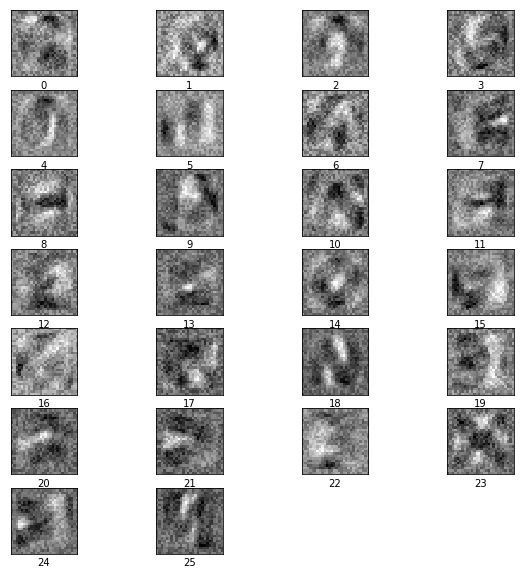

In [26]:
plt.figure(figsize=(10,10))
for i in range(26):
    plt.subplot(7,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(linear_model.get_layer(index=1).get_weights()[0][:, i].reshape((28, 28)) * -1, cmap='gray')
    plt.xlabel(i)
    plt.grid(False)

plt.show()

<h3> Задание 1</h3>

In [29]:
from tensorflow.keras.layers import Dense, Flatten, Activation

*Модель с 2мя слоями*

In [30]:
linear_model = keras.Sequential()

linear_model.add(Flatten()) 

linear_model.add(Dense(100, activation='relu'))
linear_model.add(Dense(100, activation='relu'))  

linear_model.add(Dense(26, activation=tf.nn.softmax)) 

In [31]:
linear_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])


In [32]:
linear_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
65000/65000 [==============================] - 6s 89us/step - loss: 1.8119 - acc: 0.5068
Epoch 2/10
65000/65000 [==============================] - 6s 88us/step - loss: 1.0800 - acc: 0.6880
Epoch 3/10
65000/65000 [==============================] - 6s 87us/step - loss: 0.9041 - acc: 0.7405
Epoch 4/10
65000/65000 [==============================] - 7s 112us/step - loss: 0.7810 - acc: 0.7754
Epoch 5/10
65000/65000 [==============================] - 6s 88us/step - loss: 0.6896 - acc: 0.7992
Epoch 6/10
65000/65000 [==============================] - 6s 88us/step - loss: 0.6227 - acc: 0.8166
Epoch 7/10
65000/65000 [==============================] - 6s 100us/step - loss: 0.5715 - acc: 0.8307
Epoch 8/10
65000/65000 [==============================] - 6s 88us/step - loss: 0.5305 - acc: 0.8426
Epoch 9/10
65000/65000 [==============================] - 6s 91us/step - loss: 0.4980 - acc: 0.8497
Epoch 10/10
65000/65000 [==============================] - 5s 84us/step - loss: 0.4712 - acc: 0.85

In [33]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 0s 37us/step
Test accuracy: 0.8480769230769231 
Test loss: 0.5015984591704149


Будем подбирать параметры для нейросети

In [43]:
%%time
neurons = [50, 100, 200, 300]

for n in neurons:
    for m in neurons:
        linear_model = keras.Sequential([
            Flatten(), 
            Dense(n, activation='relu'),
            Dense(m, activation='relu'),
            Dense(26, activation=tf.nn.softmax) 
        ])
        linear_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

        linear_model.fit(train_images, train_labels, epochs=10, verbose=0)
        
        test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
        
        print("n = %d m = %d \tTest accuracy = %f Test loss = %f" % (n, m, test_acc, test_loss))

13000/13000 [==============================] - 1s 47us/step
n = 50 m = 50 	Test accuracy = 0.818923 Test loss = 0.611686
13000/13000 [==============================] - 0s 33us/step
n = 50 m = 100 	Test accuracy = 0.830154 Test loss = 0.562239
13000/13000 [==============================] - 0s 35us/step
n = 50 m = 200 	Test accuracy = 0.832538 Test loss = 0.548974
13000/13000 [==============================] - 0s 37us/step
n = 50 m = 300 	Test accuracy = 0.844308 Test loss = 0.526319
13000/13000 [==============================] - 1s 40us/step
n = 100 m = 50 	Test accuracy = 0.827077 Test loss = 0.552060
13000/13000 [==============================] - 1s 44us/step
n = 100 m = 100 	Test accuracy = 0.852846 Test loss = 0.490947
13000/13000 [==============================] - 1s 45us/step
n = 100 m = 200 	Test accuracy = 0.850000 Test loss = 0.492847
13000/13000 [==============================] - 1s 48us/step
n = 100 m = 300 	Test accuracy = 0.853000 Test loss = 0.492573
13000/13000 [=========

Для первого слоя выберем 300 нейронов, для второго - 200

In [44]:
linear_model = keras.Sequential([
            Flatten(), 
            Dense(300, activation='relu'),
            Dense(200, activation='relu'),
            Dense(26, activation=tf.nn.softmax) 
        ]) 

In [45]:
linear_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [46]:
linear_model.fit(train_images, train_labels, epochs=10, verbose=0)

In [47]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 1s 79us/step
Test accuracy: 0.8701538461538462 
Test loss: 0.4297672096765958


Посмотрим другие функции активации

In [61]:
%%time
act_function = ['sigmoid', 'tanh']

for act in act_function:
    linear_model = keras.Sequential([
        Flatten(), 
        Dense(300, activation=act),
        Dense(200, activation=act),
        Dense(26, activation=tf.nn.softmax) 
    ])
    linear_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

    linear_model.fit(train_images, train_labels, epochs=10, verbose=0)

    test_loss, test_acc = linear_model.evaluate(test_images, test_labels)

    print("Activation function: %s \tTest accuracy = %f Test loss= %f" % (act, test_acc, test_loss))

13000/13000 [==============================] - 1s 68us/step
Activation function: sigmoid 	Test accuracy = 0.612846 Test loss= 1.327862
13000/13000 [==============================] - 1s 71us/step
Activation function: tanh 	Test accuracy = 0.843000 Test loss= 0.536195
Wall time: 2min 18s


Наилучшее качество получается при использовании функции Relu, в соответствии с этим для инициализации весов используем he-normal

In [95]:
del linear_model

In [96]:
linear_model = keras.Sequential([
        Flatten(), 
        Dense(200, activation='relu',
              kernel_initializer='he_normal', bias_initializer='zeros'),
        Dense(200, activation='relu', 
              kernel_initializer='he_normal', bias_initializer='zeros'),
        Dense(26, activation=tf.nn.softmax) 
    ])

In [97]:
linear_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [98]:
linear_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
65000/65000 [==============================] - 10s 161us/step - loss: 1.5602 - acc: 0.5675
Epoch 2/10
65000/65000 [==============================] - 8s 130us/step - loss: 0.9343 - acc: 0.7293
Epoch 3/10
65000/65000 [==============================] - 9s 142us/step - loss: 0.7582 - acc: 0.7809
Epoch 4/10
65000/65000 [==============================] - 9s 141us/step - loss: 0.6472 - acc: 0.8109
Epoch 5/10
65000/65000 [==============================] - 11s 166us/step - loss: 0.5715 - acc: 0.8314
Epoch 6/10
65000/65000 [==============================] - 10s 147us/step - loss: 0.5158 - acc: 0.8468
Epoch 7/10
65000/65000 [==============================] - 9s 135us/step - loss: 0.4752 - acc: 0.8574
Epoch 8/10
65000/65000 [==============================] - 10s 148us/step - loss: 0.4414 - acc: 0.8671
Epoch 9/10
65000/65000 [==============================] - 10s 147us/step - loss: 0.4141 - acc: 0.8742
Epoch 10/10
65000/65000 [==============================] - 9s 133us/step - loss: 0.391

In [99]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 1s 87us/step
Test accuracy: 0.8687692307692307 
Test loss: 0.4387929956179399


In [84]:
del linear_model

In [85]:
from tensorflow.keras.layers import BatchNormalization

In [91]:
linear_model = keras.Sequential([
        Flatten(), 
        Dense(300, kernel_initializer='he_normal', bias_initializer='zeros'),
        BatchNormalization(), 
        Activation('relu'),
    
        Dense(200, kernel_initializer='he_normal', bias_initializer='zeros'),
        BatchNormalization(), 
        Activation('relu'),
    
        Dense(26, activation=tf.nn.softmax) 
    ])

In [92]:
linear_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [93]:
linear_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
65000/65000 [==============================] - 13s 193us/step - loss: 1.5021 - acc: 0.5812
Epoch 2/10
65000/65000 [==============================] - 11s 169us/step - loss: 0.9076 - acc: 0.7382
Epoch 3/10
65000/65000 [==============================] - 11s 176us/step - loss: 0.7279 - acc: 0.7890
Epoch 4/10
65000/65000 [==============================] - 11s 171us/step - loss: 0.6127 - acc: 0.8200
Epoch 5/10
65000/65000 [==============================] - 11s 174us/step - loss: 0.5345 - acc: 0.8410
Epoch 6/10
65000/65000 [==============================] - 11s 173us/step - loss: 0.4783 - acc: 0.8572
Epoch 7/10
65000/65000 [==============================] - 11s 173us/step - loss: 0.4357 - acc: 0.8694
Epoch 8/10
65000/65000 [==============================] - 11s 173us/step - loss: 0.4018 - acc: 0.8783
Epoch 9/10
65000/65000 [==============================] - 11s 173us/step - loss: 0.3732 - acc: 0.8855
Epoch 10/10
65000/65000 [==============================] - 11s 174us/step - loss: 

In [94]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 1s 108us/step
Test accuracy: 0.8692307692307693 
Test loss: 0.4219458129772773


In [105]:
del linear_model

Посмотрим другой оптимизатор

In [100]:
from tensorflow.keras.optimizers import Adam

In [106]:
linear_model = keras.Sequential([
        Flatten(), 
    
        Dense(300, kernel_initializer='he_normal', bias_initializer='zeros'),
        BatchNormalization(), 
        Activation('relu'),
    
        Dense(200, kernel_initializer='he_normal', bias_initializer='zeros'),
        BatchNormalization(), 
        Activation('relu'),
    
        Dense(26, activation=tf.nn.softmax) 
    ])

In [107]:
linear_model.compile(optimizer=Adam(lr=0.001), 
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [108]:
linear_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
65000/65000 [==============================] - 25s 382us/step - loss: 0.6986 - acc: 0.7867
Epoch 2/10
65000/65000 [==============================] - 21s 327us/step - loss: 0.3746 - acc: 0.8791
Epoch 3/10
65000/65000 [==============================] - 21s 324us/step - loss: 0.2933 - acc: 0.9016
Epoch 4/10
65000/65000 [==============================] - 30s 463us/step - loss: 0.2474 - acc: 0.9146
Epoch 5/10
65000/65000 [==============================] - 19s 296us/step - loss: 0.2074 - acc: 0.9272
Epoch 6/10
65000/65000 [==============================] - 20s 308us/step - loss: 0.1865 - acc: 0.9332
Epoch 7/10
65000/65000 [==============================] - 21s 327us/step - loss: 0.1662 - acc: 0.9382
Epoch 8/10
65000/65000 [==============================] - 21s 323us/step - loss: 0.1505 - acc: 0.9439
Epoch 9/10
65000/65000 [==============================] - 21s 318us/step - loss: 0.1362 - acc: 0.9481
Epoch 10/10
65000/65000 [==============================] - 21s 318us/step - loss: 

In [109]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 2s 116us/step
Test accuracy: 0.8915384615384615 
Test loss: 0.42560422560343375


Качество немного повысилось. Но заметно переобучение: качество на тестовой выборке получается хуже

Подберем параметр Dropout чтобы отсечь часть нейронов

In [120]:
del linear_model

In [121]:
from tensorflow.keras.layers import Dropout

In [122]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [123]:
linear_model = keras.Sequential([
        Flatten(), 
        
        Dense(300, kernel_initializer='he_normal', bias_initializer='zeros'),
        BatchNormalization(), 
        Activation('relu'),
        Dropout(0.5),
        
        Dense(200, kernel_initializer='he_normal', bias_initializer='zeros'),
        BatchNormalization(), 
        Activation('relu'),
        Dropout(0.5),
        
        Dense(26, activation=tf.nn.softmax, 
              kernel_initializer='he_normal', bias_initializer='zeros') 
    ])
    

In [125]:
linear_model.compile(optimizer=Adam(lr=0.001), 
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [126]:
linear_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
65000/65000 [==============================] - 20s 313us/step - loss: 0.7113 - acc: 0.7848
Epoch 2/10
65000/65000 [==============================] - 19s 288us/step - loss: 0.3735 - acc: 0.8792
Epoch 3/10
65000/65000 [==============================] - 19s 291us/step - loss: 0.2962 - acc: 0.9017
Epoch 4/10
65000/65000 [==============================] - 19s 289us/step - loss: 0.2460 - acc: 0.9164
Epoch 5/10
65000/65000 [==============================] - 24s 371us/step - loss: 0.2134 - acc: 0.9246
Epoch 6/10
65000/65000 [==============================] - 22s 343us/step - loss: 0.1837 - acc: 0.9335
Epoch 7/10
65000/65000 [==============================] - 22s 338us/step - loss: 0.1661 - acc: 0.9387
Epoch 8/10
65000/65000 [==============================] - 22s 331us/step - loss: 0.1470 - acc: 0.9448
Epoch 9/10
65000/65000 [==============================] - 22s 335us/step - loss: 0.1367 - acc: 0.9481
Epoch 10/10
65000/65000 [==============================] - 20s 307us/step - loss: 

In [127]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 2s 186us/step
Test accuracy: 0.8993076923076923 
Test loss: 0.392272816823079


Видим, что немного снизилось значение функции потерь. На Grid Search подберем оптимальную вероятность для Dropout, а также learning rate

In [129]:
del linear_model

In [130]:
def create_model(learning_rate=0.001, p=0.5):
    linear_model = keras.Sequential([
        Flatten(), 
        
        Dense(300, kernel_initializer='he_normal', bias_initializer='zeros'),
        BatchNormalization(), 
        Activation('relu'),
        Dropout(p),
        
        Dense(200, kernel_initializer='he_normal', bias_initializer='zeros'),
        BatchNormalization(), 
        Activation('relu'),
        Dropout(p),
        
        Dense(26, activation=tf.nn.softmax) 
    ])
    
    linear_model.compile(optimizer=Adam(lr=learning_rate), 
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
    return linear_model

In [132]:
model = KerasClassifier(build_fn=create_model, epochs=10)

In [133]:
params = {'learning_rate': np.array(range(1,10,2))/1000,
          'p': np.array(range(5,10,1))/10,
         }

In [134]:
clf = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1)

In [135]:
%%time
clf.fit(train_images, train_labels)

Epoch 1/10
65000/65000 [==============================] - 59s 911us/step - loss: 0.7022 - acc: 0.7859
Epoch 2/10
65000/65000 [==============================] - 17s 255us/step - loss: 0.3742 - acc: 0.8780
Epoch 3/10
65000/65000 [==============================] - 17s 259us/step - loss: 0.2942 - acc: 0.9010
Epoch 4/10
65000/65000 [==============================] - 17s 263us/step - loss: 0.2463 - acc: 0.9152
Epoch 5/10
65000/65000 [==============================] - 16s 249us/step - loss: 0.2119 - acc: 0.9247
Epoch 6/10
65000/65000 [==============================] - 18s 276us/step - loss: 0.1873 - acc: 0.9325
Epoch 7/10
65000/65000 [==============================] - 17s 259us/step - loss: 0.1658 - acc: 0.9391
Epoch 8/10
65000/65000 [==============================] - 19s 285us/step - loss: 0.1482 - acc: 0.9449
Epoch 9/10
65000/65000 [==============================] - 19s 287us/step - loss: 0.1356 - acc: 0.9486
Epoch 10/10
65000/65000 [==============================] - 19s 294us/step - loss: 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000288558F66D8>,
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': array([0.001, 0.003, 0.005, 0.007, 0.009]), 'p': array([0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [136]:
clf.best_params_

{'learning_rate': 0.001, 'p': 0.6}

In [161]:
linear_model = keras.Sequential([
        Flatten(), 
        
        Dense(300, kernel_initializer='he_normal', bias_initializer='zeros'),
        BatchNormalization(), 
        Activation('relu'),
        Dropout(0.6),
        
        Dense(200, kernel_initializer='he_normal', bias_initializer='zeros'),
        BatchNormalization(), 
        Activation('relu'),
        Dropout(0.6),
        
        Dense(26, activation=tf.nn.softmax) 
    ])
    

In [162]:
linear_model.compile(optimizer=Adam(lr=0.001), 
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [163]:
linear_model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
65000/65000 [==============================] - 22s 333us/step - loss: 0.6994 - acc: 0.7874
Epoch 2/20
65000/65000 [==============================] - 19s 291us/step - loss: 0.3733 - acc: 0.8803
Epoch 3/20
65000/65000 [==============================] - 19s 289us/step - loss: 0.2945 - acc: 0.9027
Epoch 4/20
65000/65000 [==============================] - 19s 288us/step - loss: 0.2471 - acc: 0.9148
Epoch 5/20
65000/65000 [==============================] - 19s 290us/step - loss: 0.2126 - acc: 0.9252
Epoch 6/20
65000/65000 [==============================] - 20s 309us/step - loss: 0.1845 - acc: 0.9338
Epoch 7/20
65000/65000 [==============================] - 20s 311us/step - loss: 0.1637 - acc: 0.9398
Epoch 8/20
65000/65000 [==============================] - 19s 297us/step - loss: 0.1492 - acc: 0.9453
Epoch 9/20
65000/65000 [==============================] - 19s 290us/step - loss: 0.1369 - acc: 0.9475
Epoch 10/20
65000/65000 [==============================] - 19s 291us/step - loss: 

In [164]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 2s 146us/step
Test accuracy: 0.8982307692307693 
Test loss: 0.5019332273029364


Качество не улучшилось, а ошибка возросла

Модель все равно переобучается, попробуем применить регуляризацию

In [257]:
del linear_model

In [261]:
linear_model = keras.Sequential([
        Flatten(), 
        
        Dense(200, kernel_initializer='he_normal', bias_initializer='zeros', 
              kernel_regularizer=regularizers.l2(0.09)),
        BatchNormalization(), 
        Activation('relu'),
        Dropout(0.2),
        
        Dense(100, kernel_initializer='he_normal', bias_initializer='zeros', 
              kernel_regularizer=regularizers.l2(0.09)),
        BatchNormalization(), 
        Activation('relu'),
        Dropout(0.2),
        
        Dense(26, activation=tf.nn.softmax) 
    ])
    

In [262]:
linear_model.compile(optimizer=Adam(lr=0.001), 
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [265]:
linear_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
65000/65000 [==============================] - 34s 516us/step - loss: 1.4182 - acc: 0.6858
Epoch 2/10
65000/65000 [==============================] - 33s 515us/step - loss: 1.3236 - acc: 0.7044
Epoch 3/10
65000/65000 [==============================] - 33s 515us/step - loss: 1.2583 - acc: 0.7197
Epoch 4/10
65000/65000 [==============================] - 33s 514us/step - loss: 1.2186 - acc: 0.7283
Epoch 5/10
65000/65000 [==============================] - 34s 521us/step - loss: 1.1752 - acc: 0.7386
Epoch 6/10
65000/65000 [==============================] - 34s 520us/step - loss: 1.1514 - acc: 0.7452
Epoch 7/10
65000/65000 [==============================] - 34s 520us/step - loss: 1.1252 - acc: 0.7504
Epoch 8/10
65000/65000 [==============================] - 34s 523us/step - loss: 1.1130 - acc: 0.7516
Epoch 9/10
65000/65000 [==============================] - 34s 517us/step - loss: 1.0963 - acc: 0.7575
Epoch 10/10
65000/65000 [==============================] - 34s 518us/step - loss: 

In [266]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 3s 215us/step
Test accuracy: 0.7686923076923077 
Test loss: 1.0520356783500084


Переобучения нет, но сильно пострадало качество 

In [ ]:
# подобрать параметры (на Grid Search очень долго)

*Модель с 3мя слоями*

In [22]:
from tensorflow.keras.models import model_from_json

In [305]:
linear_model = keras.Sequential([
        Flatten(), 
        
        Dense(300, activation='relu'),
        
        Dense(200, activation='relu'),
    
        Dense(100, activation='relu'),
    
        Dense(26, activation=tf.nn.softmax) 
    ])

In [306]:
linear_model.compile(optimizer=Adam(lr=0.001), 
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [307]:
linear_model.fit(train_images, train_labels, epochs=7)

Epoch 1/7
65000/65000 [==============================] - 53s 808us/step - loss: 0.7137 - acc: 0.7820
Epoch 2/7
65000/65000 [==============================] - 45s 691us/step - loss: 0.3764 - acc: 0.8777
Epoch 3/7
65000/65000 [==============================] - 47s 721us/step - loss: 0.2948 - acc: 0.9008
Epoch 4/7
65000/65000 [==============================] - 45s 696us/step - loss: 0.2524 - acc: 0.9135
Epoch 5/7
65000/65000 [==============================] - 45s 700us/step - loss: 0.2193 - acc: 0.9230
Epoch 6/7
65000/65000 [==============================] - 50s 775us/step - loss: 0.1961 - acc: 0.9297
Epoch 7/7
65000/65000 [==============================] - 50s 766us/step - loss: 0.1787 - acc: 0.9343


In [308]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 8s 607us/step
Test accuracy: 0.9029230769230769 
Test loss: 0.32018948147847104


Полносвязная нейросеть с 3мя слоями немного лучше решает задачу. Для повышения качества классификации добавим сверточные слои

In [32]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [30]:
train_images_2 = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images_2 = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [33]:
train_labels_2 = to_categorical(train_labels, 26)
test_labels_2 = to_categorical(test_labels, 26)

In [320]:
train_labels_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [368]:
model1 = keras.Sequential([

        
        Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape),
        Dropout(0.2),
        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
    
        Flatten(), 
    
        Dense(300, activation='relu'),
        Dropout(0.2),
    
        Dense(26, activation=tf.nn.softmax) 
    ])

In [369]:
model1.compile(optimizer=Adam(lr=0.001), 
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [372]:
model1.fit(train_images_2, train_labels_2, validation_split=0.2, epochs=10)

Train on 52000 samples, validate on 13000 samples
Epoch 1/10
52000/52000 [==============================] - 210s 4ms/step - loss: 0.3374 - acc: 0.8883 - val_loss: 0.2839 - val_acc: 0.9095
Epoch 2/10
52000/52000 [==============================] - 211s 4ms/step - loss: 0.2662 - acc: 0.9090 - val_loss: 0.2727 - val_acc: 0.9147
Epoch 3/10
52000/52000 [==============================] - 211s 4ms/step - loss: 0.2246 - acc: 0.9212 - val_loss: 0.2601 - val_acc: 0.9138
Epoch 4/10
52000/52000 [==============================] - 211s 4ms/step - loss: 0.1926 - acc: 0.9317 - val_loss: 0.2576 - val_acc: 0.9171
Epoch 5/10
52000/52000 [==============================] - 208s 4ms/step - loss: 0.1696 - acc: 0.9384 - val_loss: 0.2480 - val_acc: 0.9185
Epoch 6/10
52000/52000 [==============================] - 209s 4ms/step - loss: 0.1502 - acc: 0.9435 - val_loss: 0.2514 - val_acc: 0.9177
Epoch 7/10
52000/52000 [==============================] - 210s 4ms/step - loss: 0.1367 - acc: 0.9482 - val_loss: 0.2547 - 

In [373]:
test_loss, test_acc = model1.evaluate(test_images_2, test_labels_2)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 8s 591us/step
Test accuracy: 0.9236923076923077 
Test loss: 0.26448951157469014


In [374]:
model1.fit(train_images_2, train_labels_2, validation_split=0.2, epochs=10)

Train on 52000 samples, validate on 13000 samples
Epoch 1/10
52000/52000 [==============================] - 212s 4ms/step - loss: 0.0992 - acc: 0.9605 - val_loss: 0.2721 - val_acc: 0.9228
Epoch 2/10
52000/52000 [==============================] - 212s 4ms/step - loss: 0.0930 - acc: 0.9624 - val_loss: 0.2867 - val_acc: 0.9178
Epoch 3/10
52000/52000 [==============================] - 214s 4ms/step - loss: 0.0923 - acc: 0.9638 - val_loss: 0.2800 - val_acc: 0.9244
Epoch 4/10
52000/52000 [==============================] - 218s 4ms/step - loss: 0.0854 - acc: 0.9662 - val_loss: 0.3072 - val_acc: 0.9178
Epoch 5/10
52000/52000 [==============================] - 213s 4ms/step - loss: 0.0796 - acc: 0.9682 - val_loss: 0.3106 - val_acc: 0.9178
Epoch 6/10
52000/52000 [==============================] - 212s 4ms/step - loss: 0.0790 - acc: 0.9685 - val_loss: 0.3128 - val_acc: 0.9216
Epoch 7/10
52000/52000 [==============================] - 211s 4ms/step - loss: 0.0752 - acc: 0.9704 - val_loss: 0.3195 - 

In [376]:
test_loss, test_acc = model1.evaluate(test_images_2, test_labels_2)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 8s 584us/step
Test accuracy: 0.9196923076923077 
Test loss: 0.3275431035860227


Модель сильно переобучилась. Попробуем покрутить параметры

In [377]:
model2 = keras.Sequential([

        
        Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape),
        Dropout(0.5),
        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.5),
    
        Flatten(), 
    
        Dense(300, activation='relu'),
        Dropout(0.5),
    
        Dense(26, activation=tf.nn.softmax) 
    ])

In [378]:
model2.compile(optimizer=Adam(lr=0.001), 
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [379]:
model2.fit(train_images_2, train_labels_2, validation_split=0.2, epochs=10)

Train on 52000 samples, validate on 13000 samples
Epoch 1/10
52000/52000 [==============================] - 230s 4ms/step - loss: 0.8832 - acc: 0.7297 - val_loss: 0.5066 - val_acc: 0.8738
Epoch 2/10
52000/52000 [==============================] - 222s 4ms/step - loss: 0.5272 - acc: 0.8308 - val_loss: 0.4204 - val_acc: 0.8938
Epoch 3/10
52000/52000 [==============================] - 215s 4ms/step - loss: 0.4545 - acc: 0.8515 - val_loss: 0.3534 - val_acc: 0.9064
Epoch 4/10
52000/52000 [==============================] - 218s 4ms/step - loss: 0.4079 - acc: 0.8658 - val_loss: 0.3364 - val_acc: 0.9099
Epoch 5/10
52000/52000 [==============================] - 213s 4ms/step - loss: 0.3783 - acc: 0.8760 - val_loss: 0.3127 - val_acc: 0.9155
Epoch 6/10
52000/52000 [==============================] - 220s 4ms/step - loss: 0.3565 - acc: 0.8800 - val_loss: 0.2859 - val_acc: 0.9142
Epoch 7/10
52000/52000 [==============================] - 217s 4ms/step - loss: 0.3416 - acc: 0.8848 - val_loss: 0.2749 - 

In [380]:
test_loss, test_acc = model2.evaluate(test_images_2, test_labels_2)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 8s 613us/step
Test accuracy: 0.9196153846153846 
Test loss: 0.25756382212272055


Переобучения нет, но качество модели не сильно возросло, зато уменьшились потери. Сохраним модель

In [400]:
model2_json = model2.to_json()
with open("cnn_model2.json", "w") as json_file:
    json_file.write(model2_json)

model2.save_weights("cnn_model2.h5")
print("Saved model to disk")

Saved model to disk


Добавим еще один сверточный слой

In [396]:
model3 = keras.Sequential([
    
        Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape),
        
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(16, kernel_size=(3, 3),
             activation='relu'),
        Dropout(0.5),
        
        Flatten(), 
    
        Dense(300, activation='relu'),
        Dropout(0.5),
    
        Dense(26, activation=tf.nn.softmax) 
    ])

In [397]:
model3.compile(optimizer=Adam(lr=0.001), 
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [398]:
model3.fit(train_images_2, train_labels_2, validation_split=0.2, epochs=10)

Train on 52000 samples, validate on 13000 samples
Epoch 1/10
52000/52000 [==============================] - 126s 2ms/step - loss: 0.8894 - acc: 0.7268 - val_loss: 0.3536 - val_acc: 0.8862
Epoch 2/10
52000/52000 [==============================] - 111s 2ms/step - loss: 0.4751 - acc: 0.8475 - val_loss: 0.2817 - val_acc: 0.9096
Epoch 3/10
52000/52000 [==============================] - 112s 2ms/step - loss: 0.3942 - acc: 0.8705 - val_loss: 0.2551 - val_acc: 0.9147
Epoch 4/10
52000/52000 [==============================] - 114s 2ms/step - loss: 0.3621 - acc: 0.8818 - val_loss: 0.2410 - val_acc: 0.9195
Epoch 5/10
52000/52000 [==============================] - 121s 2ms/step - loss: 0.3299 - acc: 0.8900 - val_loss: 0.2267 - val_acc: 0.9242
Epoch 6/10
52000/52000 [==============================] - 121s 2ms/step - loss: 0.3145 - acc: 0.8947 - val_loss: 0.2129 - val_acc: 0.9287
Epoch 7/10
52000/52000 [==============================] - 119s 2ms/step - loss: 0.2976 - acc: 0.8988 - val_loss: 0.2178 - 

In [399]:
test_loss, test_acc = model3.evaluate(test_images_2, test_labels_2)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 8s 623us/step
Test accuracy: 0.9386153846153846 
Test loss: 0.18589052773897463


In [401]:
model3_json = model3.to_json()
with open("cnn_model3.json", "w") as json_file:
    json_file.write(model3_json)

model3.save_weights("cnn_model3.h5")
print("Saved model to disk")

Saved model to disk


In [402]:
model3.fit(train_images_2, train_labels_2, validation_split=0.2, epochs=10)

Train on 52000 samples, validate on 13000 samples
Epoch 1/10
52000/52000 [==============================] - 113s 2ms/step - loss: 0.2603 - acc: 0.9096 - val_loss: 0.2032 - val_acc: 0.9295
Epoch 2/10
52000/52000 [==============================] - 115s 2ms/step - loss: 0.2552 - acc: 0.9119 - val_loss: 0.1944 - val_acc: 0.9352
Epoch 3/10
52000/52000 [==============================] - 115s 2ms/step - loss: 0.2502 - acc: 0.9153 - val_loss: 0.1925 - val_acc: 0.9342
Epoch 4/10
52000/52000 [==============================] - 120s 2ms/step - loss: 0.2394 - acc: 0.9179 - val_loss: 0.1922 - val_acc: 0.9352
Epoch 5/10
52000/52000 [==============================] - 115s 2ms/step - loss: 0.2389 - acc: 0.9168 - val_loss: 0.1958 - val_acc: 0.9363
Epoch 6/10
52000/52000 [==============================] - 115s 2ms/step - loss: 0.2309 - acc: 0.9206 - val_loss: 0.1937 - val_acc: 0.9342
Epoch 7/10
52000/52000 [==============================] - 117s 2ms/step - loss: 0.2281 - acc: 0.9187 - val_loss: 0.1867 - 

In [403]:
test_loss, test_acc = model3.evaluate(test_images_2, test_labels_2)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 8s 617us/step
Test accuracy: 0.9387692307692308 
Test loss: 0.18050952054904057


Качество не улучшилось. Попробуем увеличить количество фильтров в сверточных слоях

In [408]:
model4 = keras.Sequential([
    
        Conv2D(128, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape),
        
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(32, kernel_size=(3, 3),
             activation='relu'),
        Dropout(0.5),
        
        Flatten(), 
    
        Dense(300, activation='relu'),
        Dropout(0.5),
    
        Dense(26, activation=tf.nn.softmax) 
    ])

In [409]:
model4.compile(optimizer=Adam(lr=0.001), 
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [410]:
model4.fit(train_images_2, train_labels_2, validation_split=0.2, epochs=10)

Train on 52000 samples, validate on 13000 samples
Epoch 1/10
52000/52000 [==============================] - 217s 4ms/step - loss: 0.7800 - acc: 0.7595 - val_loss: 0.3065 - val_acc: 0.9025
Epoch 2/10
52000/52000 [==============================] - 206s 4ms/step - loss: 0.4060 - acc: 0.8695 - val_loss: 0.2507 - val_acc: 0.9182
Epoch 3/10
52000/52000 [==============================] - 208s 4ms/step - loss: 0.3384 - acc: 0.8888 - val_loss: 0.2240 - val_acc: 0.9232
Epoch 4/10
52000/52000 [==============================] - 198s 4ms/step - loss: 0.3019 - acc: 0.8987 - val_loss: 0.2094 - val_acc: 0.9276
Epoch 5/10
52000/52000 [==============================] - 193s 4ms/step - loss: 0.2723 - acc: 0.9077 - val_loss: 0.2029 - val_acc: 0.9314
Epoch 6/10
52000/52000 [==============================] - 201s 4ms/step - loss: 0.2559 - acc: 0.9142 - val_loss: 0.1936 - val_acc: 0.9345
Epoch 7/10
52000/52000 [==============================] - 250s 5ms/step - loss: 0.2459 - acc: 0.9154 - val_loss: 0.1993 - 

In [411]:
test_loss, test_acc = model4.evaluate(test_images_2, test_labels_2)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 17s 1ms/step
Test accuracy: 0.94 
Test loss: 0.17091266797139096


In [412]:
model4_json = model4.to_json()
with open("cnn_model4.json", "w") as json_file:
    json_file.write(model4_json)

model4.save_weights("cnn_model4.h5")
print("Saved model to disk")

Saved model to disk


In [422]:
model5 = keras.Sequential([
    
        Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape),
        
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(32, kernel_size=(3, 3),
             activation='relu'),
    
        MaxPooling2D(pool_size=(2, 2)),
    
        Dropout(0.5),
        
        Flatten(), 
    
        Dense(200, activation='relu'),
        Dropout(0.5),
    
        Dense(26, activation=tf.nn.softmax) 
    ])

In [423]:
model5.compile(optimizer=Adam(lr=0.001), 
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [424]:
model5.fit(train_images_2, train_labels_2, validation_split=0.2, epochs=10)

Train on 52000 samples, validate on 13000 samples
Epoch 1/10
52000/52000 [==============================] - 170s 3ms/step - loss: 1.0270 - acc: 0.6813 - val_loss: 0.3613 - val_acc: 0.8823
Epoch 2/10
52000/52000 [==============================] - 154s 3ms/step - loss: 0.5373 - acc: 0.8269 - val_loss: 0.2824 - val_acc: 0.9074
Epoch 3/10
52000/52000 [==============================] - 154s 3ms/step - loss: 0.4542 - acc: 0.8533 - val_loss: 0.2536 - val_acc: 0.9149
Epoch 4/10
52000/52000 [==============================] - 153s 3ms/step - loss: 0.4104 - acc: 0.8669 - val_loss: 0.2350 - val_acc: 0.9225
Epoch 5/10
52000/52000 [==============================] - 152s 3ms/step - loss: 0.3788 - acc: 0.8768 - val_loss: 0.2260 - val_acc: 0.9266
Epoch 6/10
52000/52000 [==============================] - 152s 3ms/step - loss: 0.3600 - acc: 0.8822 - val_loss: 0.2115 - val_acc: 0.9277
Epoch 7/10
52000/52000 [==============================] - 155s 3ms/step - loss: 0.3485 - acc: 0.8859 - val_loss: 0.2088 - 

In [425]:
test_loss, test_acc = model5.evaluate(test_images_2, test_labels_2)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 17s 1ms/step
Test accuracy: 0.94 
Test loss: 0.17091266797139096


In [430]:
model6 = keras.Sequential([
    
        Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape),
        
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(32, kernel_size=(3, 3),
             activation='relu'),
    
        MaxPooling2D(pool_size=(2, 2)),
    
        Dropout(0.5),
        
        Flatten(), 
    
        Dense(50, activation='relu'),
        Dense(300, activation='relu'),
        Dropout(0.5),
    
        Dense(26, activation=tf.nn.softmax) 
    ])

In [431]:
model6.compile(optimizer=Adam(lr=0.001), 
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [432]:
model6.fit(train_images_2, train_labels_2, validation_split=0.2, epochs=10)

Train on 52000 samples, validate on 13000 samples
Epoch 1/10
52000/52000 [==============================] - 167s 3ms/step - loss: 0.9641 - acc: 0.6996 - val_loss: 0.3590 - val_acc: 0.8867
Epoch 2/10
52000/52000 [==============================] - 155s 3ms/step - loss: 0.4721 - acc: 0.8486 - val_loss: 0.2810 - val_acc: 0.9077
Epoch 3/10
52000/52000 [==============================] - 156s 3ms/step - loss: 0.3942 - acc: 0.8731 - val_loss: 0.2545 - val_acc: 0.9155
Epoch 4/10
52000/52000 [==============================] - 153s 3ms/step - loss: 0.3508 - acc: 0.8857 - val_loss: 0.2303 - val_acc: 0.9223
Epoch 5/10
52000/52000 [==============================] - 153s 3ms/step - loss: 0.3296 - acc: 0.8918 - val_loss: 0.2214 - val_acc: 0.9268
Epoch 6/10
52000/52000 [==============================] - 152s 3ms/step - loss: 0.3075 - acc: 0.8978 - val_loss: 0.2137 - val_acc: 0.9297
Epoch 7/10
52000/52000 [==============================] - 148s 3ms/step - loss: 0.2923 - acc: 0.9040 - val_loss: 0.2111 - 

In [434]:
test_loss, test_acc = model6.evaluate(test_images_2, test_labels_2)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 11s 866us/step
Test accuracy: 0.9353846153846154 
Test loss: 0.18969252068721332


In [437]:
from tensorflow.keras.optimizers import Adagrad

In [443]:
model7 = keras.Sequential([
    
        Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape),
        
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(32, kernel_size=(3, 3),
             activation='relu'),
    
        MaxPooling2D(pool_size=(2, 2)),
    
        Dropout(0.5),
        
        Flatten(), 
    
        Dense(300, activation='relu'),
        Dropout(0.5),
        Dense(200, activation='relu'),
        Dropout(0.5),
    
        Dense(26, activation=tf.nn.softmax) 
    ])

In [444]:
model7.compile(optimizer=Adam(lr=0.001), 
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [445]:
model7.fit(train_images_2, train_labels_2, validation_split=0.2, epochs=10)

Train on 52000 samples, validate on 13000 samples
Epoch 1/10
52000/52000 [==============================] - 180s 3ms/step - loss: 1.2489 - acc: 0.6149 - val_loss: 0.4188 - val_acc: 0.8648
Epoch 2/10
52000/52000 [==============================] - 164s 3ms/step - loss: 0.6500 - acc: 0.7953 - val_loss: 0.3087 - val_acc: 0.9043
Epoch 3/10
52000/52000 [==============================] - 165s 3ms/step - loss: 0.5515 - acc: 0.8269 - val_loss: 0.2680 - val_acc: 0.9178
Epoch 4/10
52000/52000 [==============================] - 165s 3ms/step - loss: 0.4883 - acc: 0.8458 - val_loss: 0.2528 - val_acc: 0.9158
Epoch 5/10
52000/52000 [==============================] - 165s 3ms/step - loss: 0.4506 - acc: 0.8581 - val_loss: 0.2292 - val_acc: 0.9238
Epoch 6/10
52000/52000 [==============================] - 138s 3ms/step - loss: 0.4257 - acc: 0.8646 - val_loss: 0.2327 - val_acc: 0.9179
Epoch 7/10
52000/52000 [==============================] - 146s 3ms/step - loss: 0.4067 - acc: 0.8712 - val_loss: 0.2197 - 

In [446]:
test_loss, test_acc = model6.evaluate(test_images_2, test_labels_2)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 9s 687us/step
Test accuracy: 0.9361538461538461 
Test loss: 0.19399848203876843


Лучшее качество - 0,94 :с (model4)

<h3> Задание 2 </h3>

In [23]:
from sklearn import metrics

In [26]:
import importlib 
import sys 
from plot_cm import plot_confusion_matrix
importlib.reload(sys.modules['plot_cm']) 

<module 'plot_cm' from 'C:\\Users\\admin\\Documents\\Задания\\Майнор\\ML\\Deep Learning\\Lab_2\\plot_cm.py'>

In [27]:
import matplotlib.pyplot as plt
from matplotlib import style

In [28]:
json_file = open('cnn_model4.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

model.load_weights("cnn_model4.h5")
print("Loaded model from disk")

Loaded model from disk


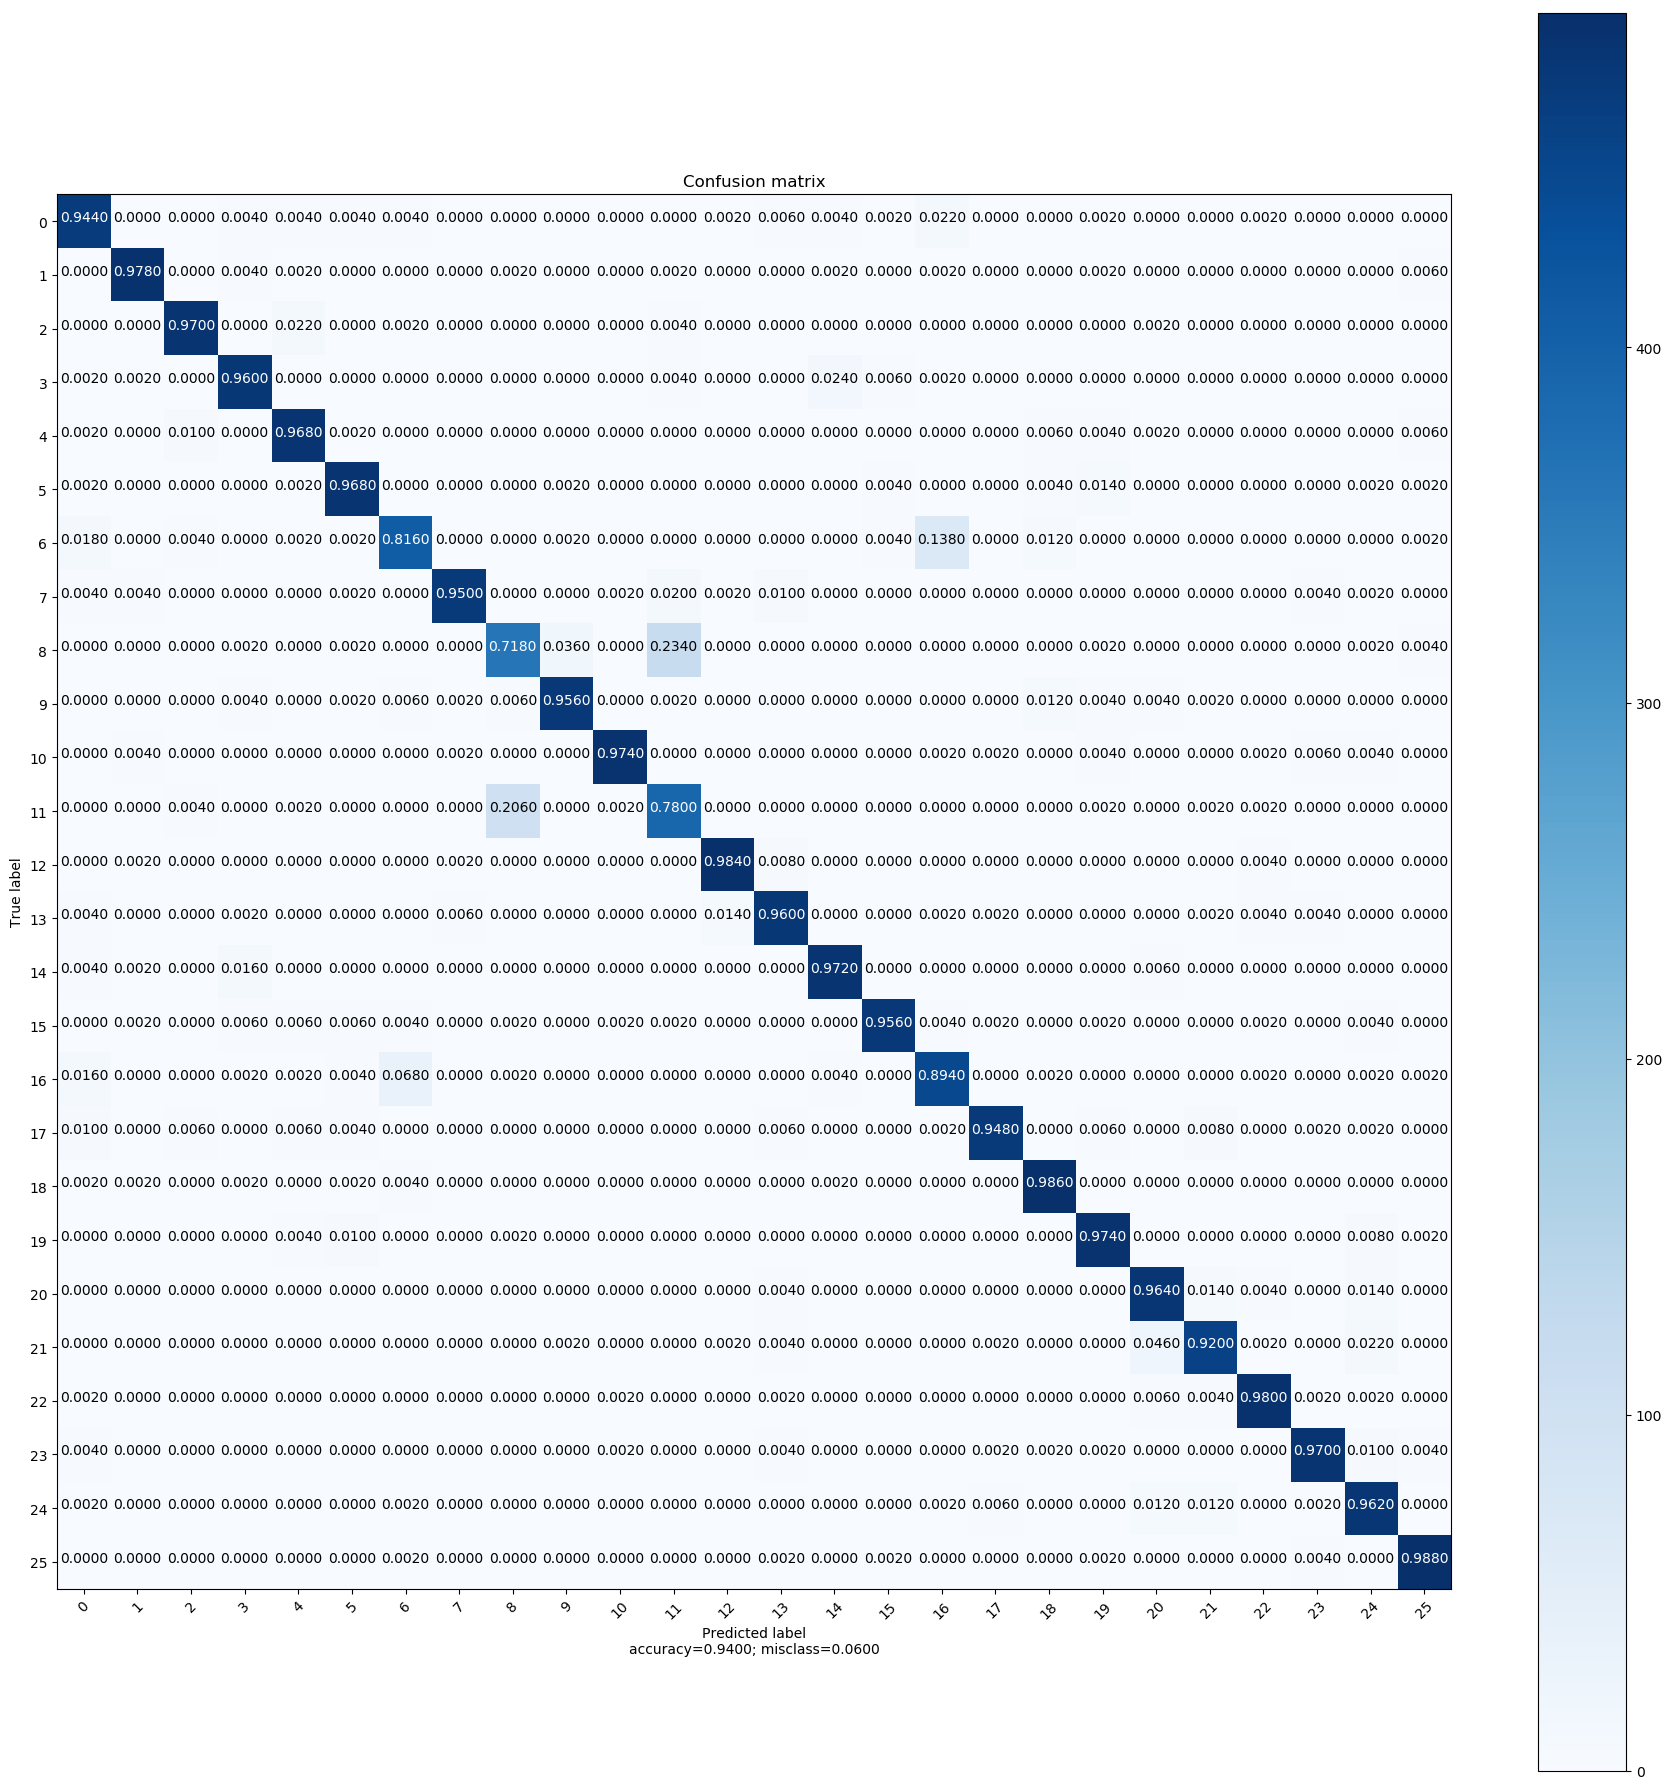

In [34]:
style.use('default')
plot_confusion_matrix(cm=metrics.confusion_matrix(test_labels, model.predict_classes(test_images_2)),
                      target_names=np.arange(0, 26),
                      normalize=True)

Между собой путаются буквы под номерами 8 и 11, 6 и 16, 3 и 14, 2 и 4, 0 и 16, 20 и 21, 21 и 24, 8 и 9, 9 и 18

In [35]:
import string
string.ascii_lowercase

letters = string.ascii_lowercase

letters[0]

'a'

In [36]:
print(letters[8], ' и ', letters[11])
print(letters[6], ' и ', letters[16])
print(letters[3], ' и ', letters[14])
print(letters[2], ' и ', letters[4])
print(letters[0], ' и ', letters[16])
print(letters[20], ' и ', letters[21])
print(letters[21], ' и ', letters[24])
print(letters[8], ' и ', letters[9])
print(letters[9], ' и ', letters[18])

i  и  l
g  и  q
d  и  o
c  и  e
a  и  q
u  и  v
v  и  y
i  и  j
j  и  s


Ошибка классификации объясняется схожестью написания этих букв

In [37]:
predicted_lables = model.predict_classes(test_images_2)

In [38]:
test_labels_series = pd.Series(test_labels)

In [546]:
for index, value in test_labels_series.items():
    if value != predicted_lables[index]:
        print('Индекс буквы:%d, Истинное значение:%d, Предсказанное значение:%d, Индекс предсказанного:%s'
              % (index, value, predicted_lables[index], np.where(test_labels==predicted_lables[index])[0][0]))


Индекс буквы:20, Истинное значение:16, Предсказанное значение:6, Индекс предсказанного:7
Индекс буквы:56, Истинное значение:19, Предсказанное значение:24, Индекс предсказанного:33
Индекс буквы:86, Истинное значение:11, Предсказанное значение:8, Индекс предсказанного:48
Индекс буквы:88, Истинное значение:13, Предсказанное значение:16, Индекс предсказанного:20
Индекс буквы:101, Истинное значение:8, Предсказанное значение:11, Индекс предсказанного:86
Индекс буквы:124, Истинное значение:16, Предсказанное значение:25, Индекс предсказанного:4
Индекс буквы:156, Истинное значение:8, Предсказанное значение:11, Индекс предсказанного:86
Индекс буквы:205, Истинное значение:8, Предсказанное значение:11, Индекс предсказанного:86
Индекс буквы:211, Истинное значение:22, Предсказанное значение:23, Индекс предсказанного:25
Индекс буквы:239, Истинное значение:7, Предсказанное значение:11, Индекс предсказанного:86
Индекс буквы:260, Истинное значение:16, Предсказанное значение:6, Индекс предсказанного:7
Ин

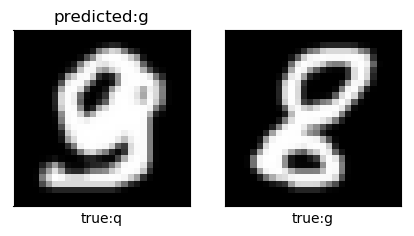

In [571]:
plt.figure(figsize=(5,5))
list = [20,7]
for i in range(len(list)):
    plt.title('predicted:%s' % letters[test_labels[list[1]]])
    plt.subplot(1,2,i+1)
    plt.xticks([])
    plt.yticks([])
    pic = test_images[list[i]]
    plt.imshow(pic.reshape((28, 28)).T, cmap='gray')
    plt.xlabel('true:%s' % letters[test_labels[list[i]]])
    plt.grid(False)

plt.show()

Букву q(слева) модель определила как g(справа)

In [572]:
print(letters[8],letters[11],letters[6])

i l g


In [578]:
print(letters[25],letters[18],letters[12])

z s m


2. В целом, модель обучилась равномерно, с некоторыми исключениями. Хуже всего определились буквы i, l, g, лучше всего - буквы z, s и m

In [591]:
worst = [8, 11, 6]
for i in worst:
    true = len(np.where(predicted_lables==i)[0])
    al = len(np.where(test_labels==i)[0])
    print('точность детектции буквы %s = %f' % (letters[i], true/al) )

точность детектции буквы i = 0.938000
точность детектции буквы l = 1.048000
точность детектции буквы g = 0.908000


Модель нашла не все буквы i и g и неправильно определила несколько букв как l

In [594]:
best = [25, 18, 12]
for i in best:
    true = len(np.where(predicted_lables==i)[0])
    al = len(np.where(test_labels==i)[0])
    print('точность детектции буквы %s = %f' % (letters[i], true/al) )

точность детектции буквы z = 1.016000
точность детектции буквы s = 1.024000
точность детектции буквы m = 1.004000


Модель неправильно определила несколько букв как z, s и m

3. Первая буква фамилии - P

In [595]:
letters[15]

'p'

In [596]:
print('точность детекции = ', len(np.where(predicted_lables==15)[0])/500)

точность детекции =  0.974


Судя по матрице, модель немного путает букву Р с буквами 2, 3, 4 , 5, 6, 8, 10, 11, 16, 17, 19, 22, 24

<h3> Задание 4 </h3>

In [40]:
from scipy.ndimage import find_objects,label 
from scipy.ndimage import imread

In [49]:
signs=find_objects(labeled)

In [59]:
from PIL import Image
img = Image.open("m.JPEG")
 
m = img.convert('1') 

In [57]:
pix = img.load()

In [58]:
pix

In [160]:
my_images = []

In [161]:
img = Image.open('m.jpeg') 
img = img.convert('1') 
m = [] 
pix = img.load() 
for x in range(28): 
    for y in range(28): 
        m.append(pix[x,y]) 

In [162]:
img = Image.open('e.jpeg') 
img = img.convert('1') 
e = [] 
pix = img.load() 
for x in range(28): 
    for y in range(28): 
        e.append(pix[x,y]) 

In [163]:
img = Image.open('r.jpeg') 
img = img.convert('1') 
r = [] 
pix = img.load() 
for x in range(28): 
    for y in range(28): 
        r.append(pix[x,y]) 

In [164]:
img = Image.open('s.jpeg') 
img = img.convert('1') 
s = [] 
pix = img.load() 
for x in range(28): 
    for y in range(28): 
        s.append(pix[x,y]) 

In [165]:
img = Image.open('v.jpeg') 
img = img.convert('1') 
v = [] 
pix = img.load() 
for x in range(28): 
    for y in range(28): 
        v.append(pix[x,y]) 

In [166]:
m = np.array(m)
e = np.array(e)
r = np.array(r)
s = np.array(s)
v = np.array(v)

In [167]:
m = m / 255.0
e = e / 255.0
r = r / 255.0
s = s / 255.0
v = v / 255.0

In [168]:
my_images.append(m)
my_images.append(v)
my_images.append(e)
my_images.append(r)
my_images.append(s)

my_images=np.array(my_images)

In [169]:
my_images.shape

(5, 784)

In [170]:
my_images_2 = my_images.reshape(my_images.shape[0], 28, 28, 1)

In [179]:
my_labels = [12, 21, 4, 17, 18]

In [181]:
my_predicted_lables = model.predict_classes(my_images_2)

In [182]:
my_predicted_lables

array([16, 16,  1,  1, 16], dtype=int64)

In [192]:
my_labels_series = pd.Series(my_labels)

In [196]:
for index, value in my_labels_series.items():
    if value != my_predicted_lables[index]:
        print('Индекс буквы:%d, Истинное значение:%d, Предсказанное значение:%d, Индекс предсказанного:%s'
              % (index, value, my_predicted_lables[index], np.where(test_labels==my_predicted_lables[index])[0][0]))


Индекс буквы:0, Истинное значение:12, Предсказанное значение:16, Индекс предсказанного:20
Индекс буквы:1, Истинное значение:21, Предсказанное значение:16, Индекс предсказанного:20
Индекс буквы:2, Истинное значение:4, Предсказанное значение:1, Индекс предсказанного:3
Индекс буквы:3, Истинное значение:17, Предсказанное значение:1, Индекс предсказанного:3
Индекс буквы:4, Истинное значение:18, Предсказанное значение:16, Индекс предсказанного:20


Модель не предсказала ни одного правильного значения :D